## Tumor Image Classifier

##### The goal is to teach a classifier how to label malign or benign tumors 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. The dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
# (data, target)
data_c = load_breast_cancer()

In [4]:
print(type(data_c))
# Bunch = dictionary like container 

<class 'sklearn.utils.Bunch'>


In [5]:
# Keys within a dictionary

data_c.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
for key in data_c.keys():
    print('key: ', key , data_c[key])

key:  data [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
key:  target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 

In [7]:
print(data_c['data'].shape, data_c['feature_names'].shape, data_c['target'].shape)


(569, 30) (30,) (569,)


In [8]:
data_df = pd.DataFrame(np.c_[data_c['data'], data_c['target']], columns= np.append(data_c['feature_names'],['target']))

In [9]:
data_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


#### 2. Data Exploration and Visualization

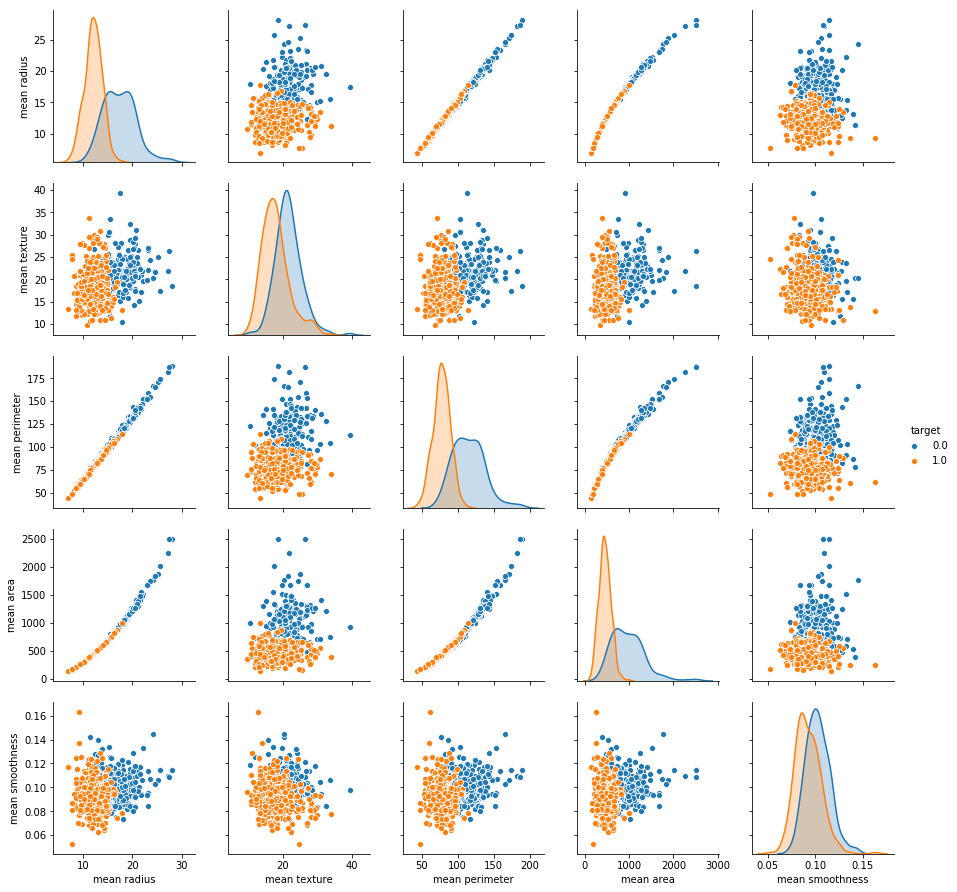

In [10]:
sns.pairplot(data_df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

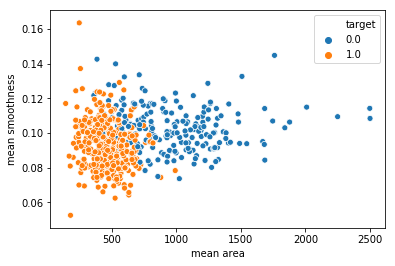

In [11]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue ='target', data=data_df)

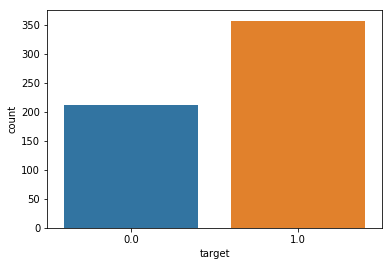

In [12]:
sns.countplot(data_df['target'])

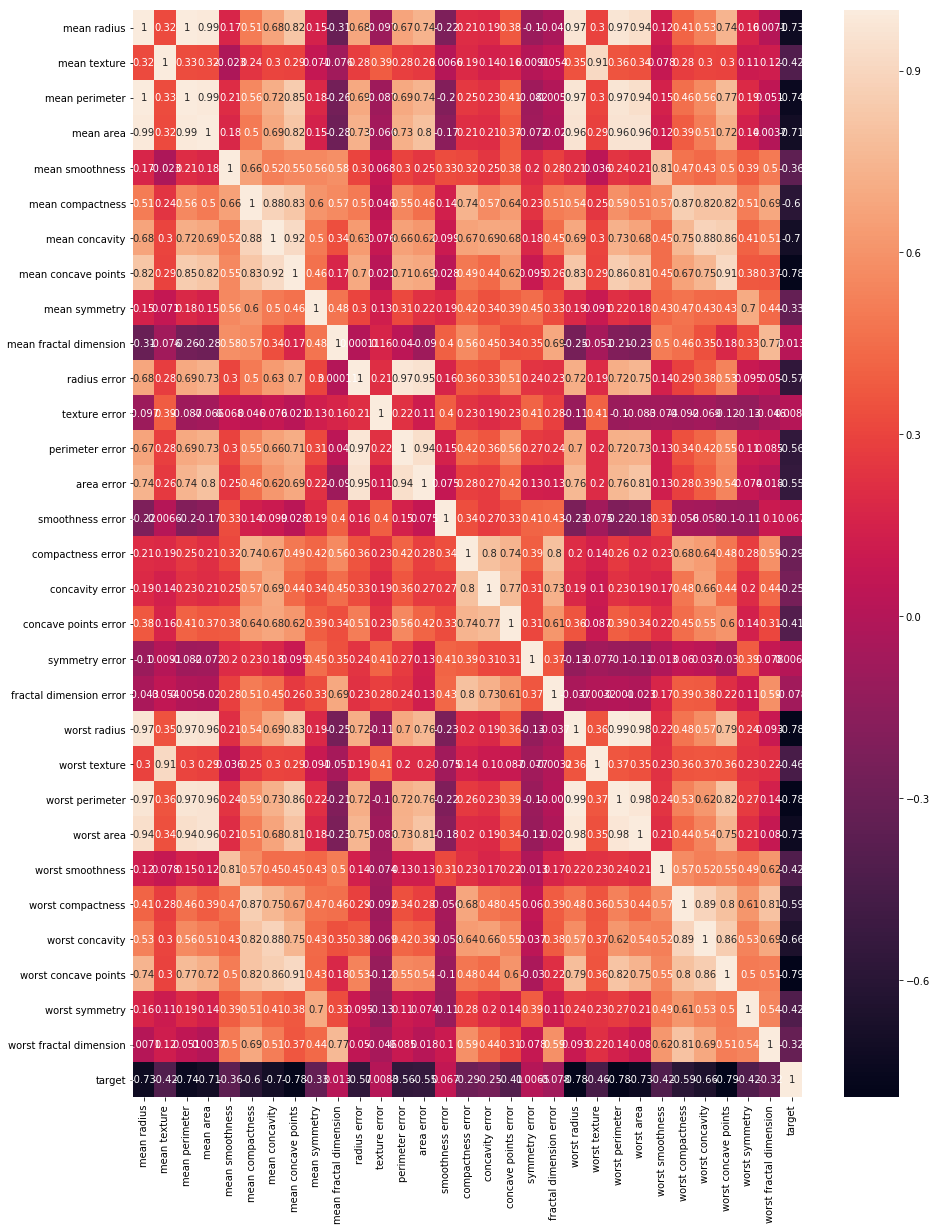

In [13]:
plt.figure(figsize=(15,20))
sns.heatmap(data_df.corr(), annot= True)

#### 3. TD TD

In [14]:
X = data_df.drop(['target'], axis=1)

In [15]:
y = data_df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.fit_transform(X_test)

In [30]:
print(X_train.shape, y_train.shape)

(455, 30) (455,)


#### 4. Support Vector Machine 

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
svm = SVC()

In [33]:
svm.fit(X_train, y_train)

/Users/William/miniconda3/envs/VisualML/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### 5. Model Evaluation

In [34]:
y_predict = svm.predict(X_test)

In [35]:
# confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
cm = confusion_matrix(y_test, y_predict)

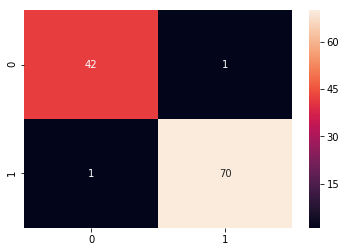

In [36]:
sns.heatmap(cm, annot= True)

In [37]:
svm.score(X_test, y_test)

0.9824561403508771

In [26]:
len(y_test)

114

In [ ]:
1